In [44]:
from datetime import datetime, timedelta, date
import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

import sys
sys.path.append('..')


from astroLuSt.project_planning import gantt as alpg


#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

# GANTT

Generate a pseudo project

In [47]:
times = np.arange(date.today()-timedelta(days=50), date.today()+timedelta(days=50), timedelta(days=1)).astype(datetime)
today = date.today()
today = datetime(today.year, today.month, today.day)

t1 = "Write Code"
t1_start        = 20
t1_end          = 70
t1_start_slope  = .2
t1_end_slope    = .5

t2 = "Test Code"
t2_start        = 48
t2_end          = 120
t2_start_slope  = .1
t2_end_slope    = .9



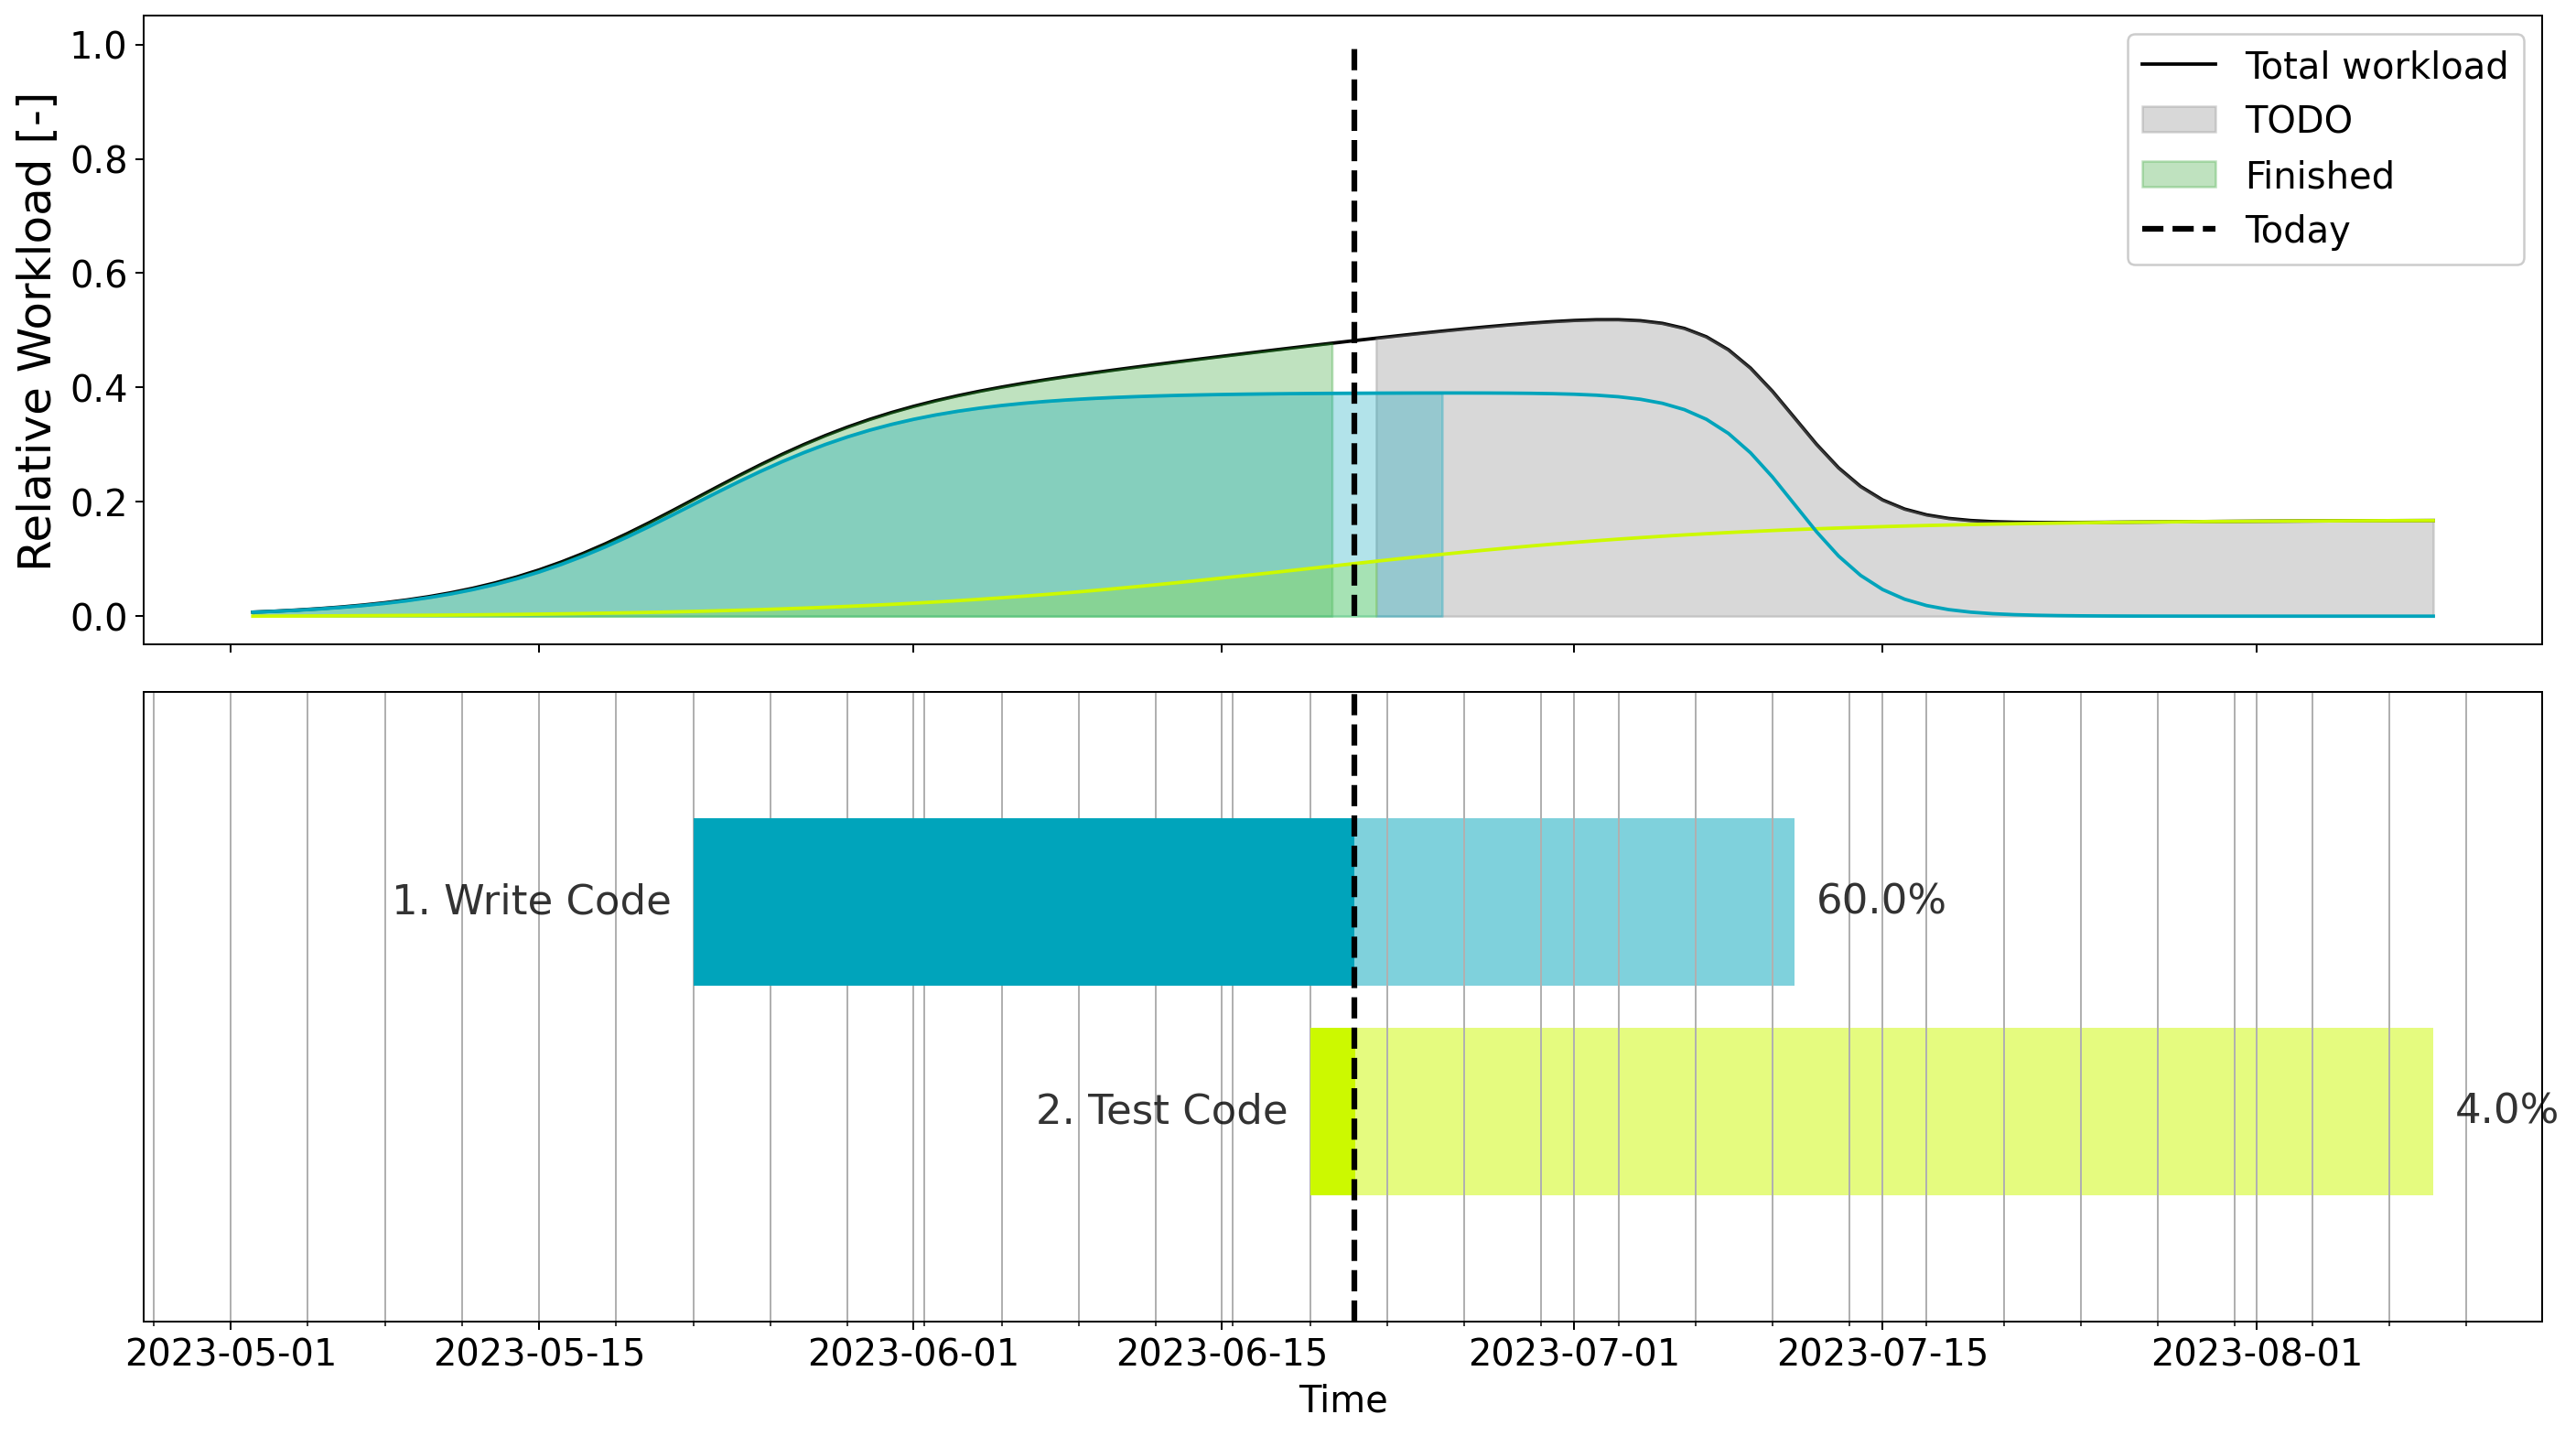

In [52]:
importlib.reload(alpg)

#initialize project
project = alpg.GANTT(times)
# print(project)

#add tasks
task1  = project.task(t1_start, t1_end, t1_start_slope, t1_end_slope, taskname=t1, weight=.7, percent_complete=0.6,  whole_area=True,  testplot=False)
task2  = project.task(t2_start, t2_end, t2_start_slope, t2_end_slope, taskname=t2, weight=.3, percent_complete=0.04, whole_area=False, testplot=False)

#get summary
plt.rcParams['figure.figsize'] = (16,9)
newtasks, fig, axs = project.plot_result(
    today=today,
    enumerate_tasks=True, show_totalwork=True, show_completion=True)
plt.show()
